# Plotting global contours: panels!

It is a common task to plot several panels of global map filled contour plots. So obrero has a function `panel_plot_contour()` that uses internally the function `plot_global_contour()` to plot several plots in different panels. You provide the function with a list of data and a list of specifications. It will figure out how many plots and how to arrange them. Until now this function can only handle up to 12 panels in a figure. First import the module:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero

Now we need some data. We will plot sea surface temperature (SST) data like we did in previous examples. So we will also need the land binary mask to avoid plotting on land:

In [2]:
# file names
f1 = 'data/sst_ctl.nc'
f2 = 'data/lsm.nc'

# read data
da = obrero.read_nc(f1, 'tosbcs')
lm = obrero.read_nc(f2, 'lsm')

# convert units
da.convert_units('Celsius')

In a first example let's say we want to plot the same data but in two different projections because we want to choose which one better shows our data. In this case we will plot the time mean and we will mask out land values:

In [3]:
# get mean
mn = da.mean(dim='time', keep_attrs=True)

# mask out land
mno = obrero.mask_land_ocean(mn, lm, ocean=True)

So to plot we need to put this same data set in a list twice because we will be plotting it twice. And then we will create two specifications dictionaries, very similar but with different argument `lon0` because we want to change the default central longitude. We also put these two in a list and then go ahead and use the function for panel plots.

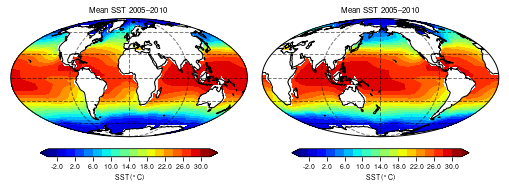

In [5]:
%matplotlib inline

# create dictionaries with specifications
spec1 = dict(method='filled', minv=-4, maxv=32, nlevels=19, extend='both',
             title=r'Mean SST 2005--2010', cbstring=r'SST (\degree\,C)')
spec2 = dict(spec1)
spec2['lon0'] = 180

# create lists
dlist = [mno, mno]
slist = [spec1, spec2]

# plot
fig = obrero.panel_global_contour(dlist, slist)

As can be seen, this function `panel_plot_contour()` returns a `matplotlib.figure.Figure` instance, in case the user would like to do something else with it. Now, this function has some other keywords the user can use.

## List of options for `panel_global_contour()`

These are all optional with default settings:

- `wmm`: width in mm
- `hmm`: height in mm
- `save`: this can be a boolean to either save it with a generic name or a string with an actual name to save the plot in a file
- `transparent`: whether to save the plot with a background or not. This is useful for slideshows.

All other specifications that can be used are the ones for the function `plot_global_contour()` and that have been explained in previous examples.